**Step 1 - Import library**

In [1]:
import os
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as Fn
import matplotlib.pyplot as plt
import random
import torchvision.models as models
import torch.optim as optim
%matplotlib inline

In [ ]:
# gpus = [0]
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ["CUDA_VISIBLE_DEVICES"] = ','.join(map(str, gpus))
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# print(f"Using {device} device")

**Step 2 - Load Dataset**

In [2]:
import os
import shutil


train_normal_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL'
test_normal_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL'
val_normal_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val//NORMAL'

train_PNEUMONIA_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
test_PNEUMONIA_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA'
val_PNEUMONIA_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA'

if not os.path.exists('/kaggle/working/dataset'):
  os.makedirs('/kaggle/working/dataset')
              
BACTERIA =[]
VIRUS =[]

for (dirname, dirs, files) in os.walk(train_PNEUMONIA_path):
    for filename in files:
        if "bacteria" in filename:
            BACTERIA.append(filename)
        else:
            VIRUS.append(filename)
            
normal_dir =  '/kaggle/working/dataset/train/NORMAL'          
bacteria_dir = '/kaggle/working/dataset/train/BACTERIA'
virus_dir = '/kaggle/working/dataset/train/VIRUS'

if not os.path.exists('/kaggle/working/dataset/train'):
  os.makedirs('/kaggle/working/dataset/train')

if not os.path.exists(normal_dir):
  os.makedirs(normal_dir)
if not os.path.exists(bacteria_dir):
  os.makedirs(bacteria_dir)

for (dirname, dirs, files) in os.walk(train_normal_path):
    for filename in files:
        shutil.copy(os.path.join(train_normal_path, filename), os.path.join(normal_dir, filename))

count = len(BACTERIA)
for x in range(count):
  shutil.copy(os.path.join(train_PNEUMONIA_path, BACTERIA[x]), os.path.join(bacteria_dir, BACTERIA[x]))

count = len(VIRUS)
if (not os.path.exists(virus_dir)) & (count != 0):
  os.makedirs(virus_dir)

for x in range(count):
  shutil.copy(os.path.join(train_PNEUMONIA_path, VIRUS[x]), os.path.join(virus_dir, VIRUS[x]))


BACTERIA =[]
VIRUS =[]
#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(test_PNEUMONIA_path):
    for filename in files:
        if "bacteria" in filename:
            BACTERIA.append(filename)
        else:
            VIRUS.append(filename)
            
print(len(VIRUS))          
normal_dir =  '/kaggle/working/dataset/test/NORMAL'           
bacteria_dir = '/kaggle/working/dataset/test/BACTERIA'
virus_dir = '/kaggle/working/dataset/test/VIRUS'
if not os.path.exists('/kaggle/working/dataset/test'):
  os.makedirs('/kaggle/working/dataset/test')

if not os.path.exists(normal_dir):
  os.makedirs(normal_dir)
if not os.path.exists(bacteria_dir):
  os.makedirs(bacteria_dir)

for (dirname, dirs, files) in os.walk(test_normal_path):
    for filename in files:
        shutil.copy(os.path.join(test_normal_path, filename), os.path.join(normal_dir, filename))
        
count = len(BACTERIA)
for x in range(count):
  shutil.copy(os.path.join(test_PNEUMONIA_path, BACTERIA[x]), os.path.join(bacteria_dir, BACTERIA[x]))

count = len(VIRUS)
if (not os.path.exists(virus_dir)) & (count != 0):
  os.makedirs(virus_dir)

for x in range(count):
  shutil.copy(os.path.join(test_PNEUMONIA_path, VIRUS[x]), os.path.join(virus_dir, VIRUS[x]))


BACTERIA =[]
VIRUS =[]
#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(val_PNEUMONIA_path):
    for filename in files:
        if "bacteria" in filename:
            BACTERIA.append(filename)
        else:
            VIRUS.append(filename)


normal_dir =  '/kaggle/working/dataset/val/NORMAL'           
bacteria_dir = '/kaggle/working/dataset/val/BACTERIA'
virus_dir = '/kaggle/working/dataset/val/VIRUS'
              
if not os.path.exists('/kaggle/working/dataset/val'):
  os.makedirs('/kaggle/working/dataset/val')
              
if not os.path.exists(normal_dir):
  os.makedirs(normal_dir)
if not os.path.exists(bacteria_dir):
  os.makedirs(bacteria_dir)

for (dirname, dirs, files) in os.walk(val_normal_path):
    for filename in files:
        shutil.copy(os.path.join(val_normal_path, filename), os.path.join(normal_dir, filename))
        
count = len(BACTERIA)
for x in range(count):
  shutil.copy(os.path.join(val_PNEUMONIA_path, BACTERIA[x]), os.path.join(bacteria_dir, BACTERIA[x]))

count = len(VIRUS)

if (not os.path.exists(virus_dir)) & (count != 0):
  os.makedirs(virus_dir)
for x in range(count):
  shutil.copy(os.path.join(val_PNEUMONIA_path, VIRUS[x]), os.path.join(virus_dir, VIRUS[x]))


148


In [13]:
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define the paths to your dataset folders
base_dir = '/kaggle/working/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define the batch size
batch_size = 150

# Define the transformations for the images
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3), # Convert image to grayscale
    transforms.Resize((224, 224)),               # Resize image to 224x224
    transforms.ToTensor(),                       # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485,0.485,0.485], std=[0.229,0.229,0.229]) # Normalize the tensor
])

# Converting_tensor_transform = transforms.ToTensor()
# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create the data loaders
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validationloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
classes = ('normal', 'bacteria', 'visus')

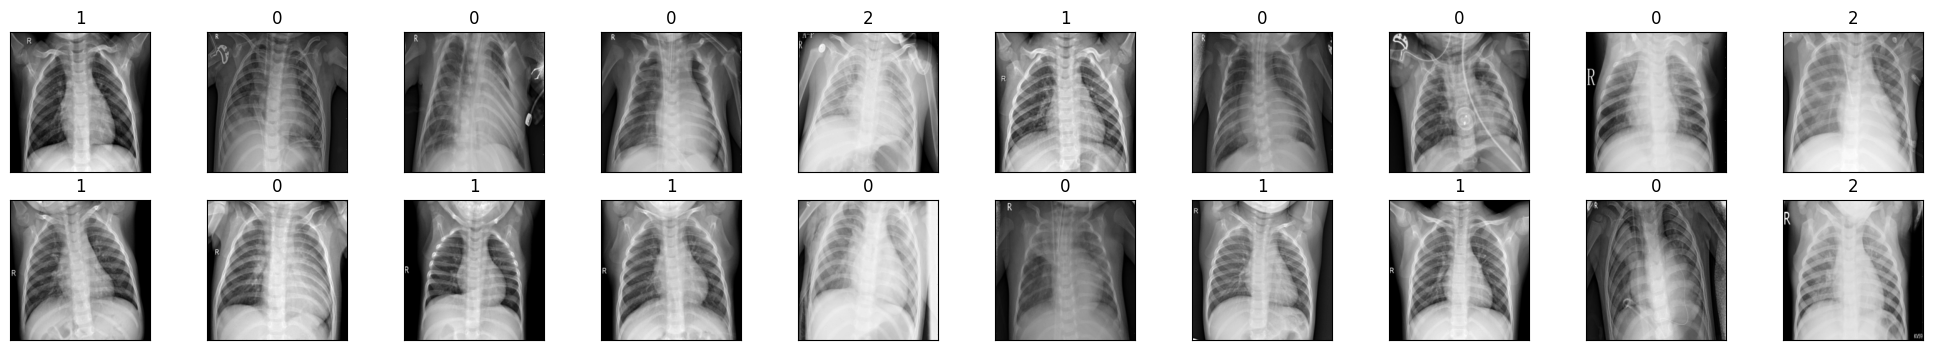

In [14]:
data_iteration = iter(trainloader)
images_data, labels_data = next(data_iteration)
images_data = images_data.numpy()
fig = plt.figure(figsize=(25, 4))
for ele in np.arange(20):
   ax = fig.add_subplot(2, 10, ele+1, xticks=[], yticks=[])
   ax.imshow(np.squeeze(images_data[ele][0]), cmap='gray')
   ax.set_title(str(labels_data[ele].item()))

In [6]:
def train(model, trainloader, criterion, optimizer, device):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    # Switch to train mode
    model.train()

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Update training loss
        train_loss += loss.item() * inputs.size(0)

        # Compute training accuracy
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute average training loss and accuracy
    train_loss = train_loss / len(trainloader.dataset)
    train_accuracy = 100.0 * train_correct / train_total

    return model, train_loss, train_accuracy

In [7]:
def test(model, testloader, criterion, device):
    test_loss = 0.0
    test_total = 0
    test_correct = 0

    # Switch to evaluation mode
    model.eval()

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Update test loss
            test_loss += loss.item() * inputs.size(0)

            # Compute test accuracy
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    # Compute average test loss and accuracy
    test_loss = test_loss / len(testloader.dataset)
    test_accuracy = 100.0 * test_correct / test_total

    return test_loss, test_accuracy

In [8]:
def train_epochs(model, trainloader, testloader, criterion, optimizer, device, num_epochs, save_interval=5):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        model, train_loss, train_accuracy = train(model, trainloader, criterion, optimizer, device)
        test_loss, test_accuracy = test(model, testloader, criterion, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f'Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.2f}%')
        print(f'Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.2f}%')
        print()

        if (epoch + 1) % save_interval == 0:
          # Save the model and variables
          torch.save(model.state_dict(), f'resnet50_cifar10_{epoch+1}.pth')
          checkpoint = {
              'epoch': epoch + 1,
              'train_losses': train_losses,
              'train_accuracies': train_accuracies,
              'test_losses': test_losses,
              'test_accuracies': test_accuracies,
              'classes': classes
          }
          torch.save(checkpoint, f'resnet50_cifar10_variables_{epoch+1}.pth')

    return model, train_losses, train_accuracies, test_losses, test_accuracies


In [9]:
def plot_loss(train_losses, test_losses):
    plt.figure()
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
    plt.plot(range(len(test_losses)), test_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('loss_plot.png')
    plt.show()

In [10]:
def plot_accuracy(train_accuracies, test_accuracies):
    plt.figure()
    plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
    plt.plot(range(len(test_accuracies)), test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('accuracy_plot.png')
    plt.show()

In [11]:
def plot_image(dataset, model, classes):
    idx = random.randint(0, len(dataset))
    label = dataset[idx][1]
    img = dataset[idx][0].unsqueeze(0).to(device)  # Move the input image tensor to the GPU
    model.eval()
    #model.to(device)  # Move the model to the GPU
    output = model(img)
    _, predicted = torch.max(output.data, 1)
    # Convert the image and show it
    img = img.squeeze().permute(1, 2, 0).cpu()  # Move the image tensor back to the CPU and adjust dimensions
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {classes[predicted]}, True: {classes[label]}')
    plt.savefig('predicted_image.png')
    plt.show()
    print("Predicted label: ", classes[predicted[0].item()])
    print("Actual label: ", classes[label])

Network before modifying conv1:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256,

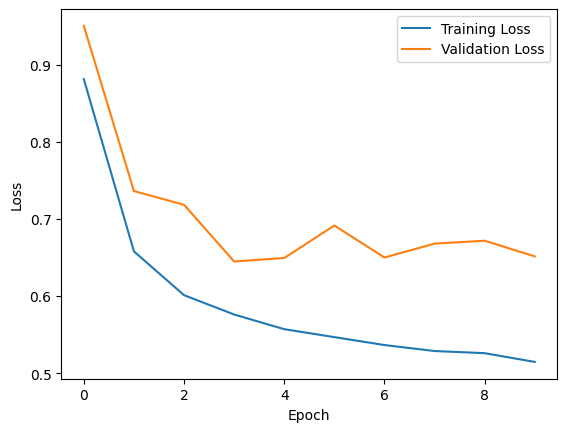

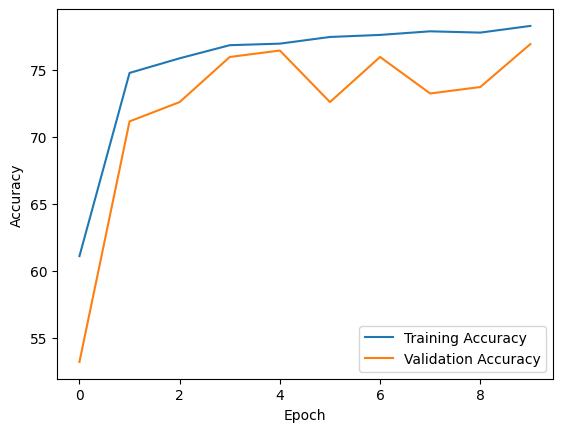

NameError: name 'testset' is not defined

In [21]:
if __name__ == '__main__':
    # Flag to control whether to run training or use saved fine-tuned model.
    train_model = True

    # Set random seed for reproducibility
#     random_seed = 42
#     torch.manual_seed(random_seed)
#     np.random.seed(random_seed)
#     random.seed(random_seed)

    # Number of classes
    num_classes = 3

    # Import ResNet50 model pretrained on ImageNet
    model = models.resnet50(pretrained=True)
    #Freeze all parameters
    for param in model.parameters():
        param.requires_grad = False
    
    #Modify conv1 to suit CIFAR-10
#     model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

    # Modify the final fully connected layer according to the number of classes
    num_features = model.fc.in_features
    

    model.fc = nn.Linear(num_features, num_classes)
    
    for param in model.fc.parameters():
        param.requires_grad = True


    print(model)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
# Create the data loaders

    # Load the dataset
#     trainset, trainloader, testset, testloader, classes = load_dataset()

    if train_model:
      # Train the model for 20 epochs, saving every 5 epochs
      num_epochs = 10
      save_interval = 5
      model, train_losses, train_accuracies, test_losses, test_accuracies = train_epochs(
          model, trainloader, testloader, criterion, optimizer, device,
          num_epochs, save_interval)

      # Save the final trained model
      torch.save(model.state_dict(), f'resnet50_{num_epochs}.pth')

      # Plot and save the loss and accuracy plots
      plot_loss(train_losses, test_losses)
      plot_accuracy(train_accuracies, test_accuracies)
    else:
      # Load the pre-trained model
      model.load_state_dict(torch.load('resnet50_cifar10_final_model_epochs_50.pth'))
      # Load the variables
      checkpoint = torch.load("resnet50_cifar10_variables.pth")
      epoch = checkpoint['epoch']
      train_losses = checkpoint['train_losses']
      train_accuracies = checkpoint['train_accuracies']
      test_losses = checkpoint['test_losses']
      test_accuracies = checkpoint['test_accuracies']
      classes = checkpoint['classes']
      model.to(device)
      model.eval()

    # Plot and save an example image
    plot_image(testset, model, classes)

Network before modifying conv1:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256,

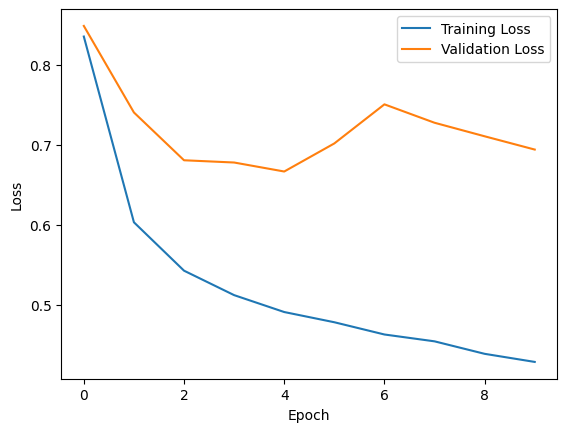

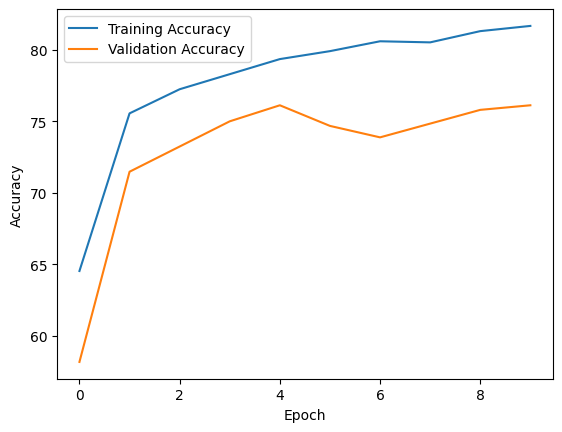

NameError: name 'testset' is not defined

In [21]:
if __name__ == '__main__':
    # Flag to control whether to run training or use saved fine-tuned model.
    train_model = True

    # Set random seed for reproducibility
#     random_seed = 42
#     torch.manual_seed(random_seed)
#     np.random.seed(random_seed)
#     random.seed(random_seed)

    # Number of classes
    num_classes = 3

    # Import ResNet50 model pretrained on ImageNet
    model = models.resnet50(pretrained=True)

    #Freeze all parameters
    for param in model.parameters():
        param.requires_grad = False
    
    #Modify conv1 to suit CIFAR-10
#     model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

    # Modify the final fully connected layer according to the number of classes
    num_features = model.fc.in_features
    

    model.fc = nn.Linear(num_features, num_classes)
    
    for param in model.fc.parameters():
        param.requires_grad = True
    for param in model. .layer4[2].parameters():
      param.requires_grad = True


    print(model)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
# Create the data loaders

    # Load the dataset
#     trainset, trainloader, testset, testloader, classes = load_dataset()

    if train_model:
      # Train the model for 20 epochs, saving every 5 epochs
      num_epochs = 10
      save_interval = 5
      model, train_losses, train_accuracies, test_losses, test_accuracies = train_epochs(
          model, trainloader, testloader, criterion, optimizer, device,
          num_epochs, save_interval)

      # Save the final trained model
      torch.save(model.state_dict(), f'resnet50_{num_epochs}.pth')

      # Plot and save the loss and accuracy plots
      plot_loss(train_losses, test_losses)
      plot_accuracy(train_accuracies, test_accuracies)
    else:
      # Load the pre-trained model
      model.load_state_dict(torch.load('resnet50_cifar10_final_model_epochs_50.pth'))
      # Load the variables
      checkpoint = torch.load("resnet50_cifar10_variables.pth")
      epoch = checkpoint['epoch']
      train_losses = checkpoint['train_losses']
      train_accuracies = checkpoint['train_accuracies']
      test_losses = checkpoint['test_losses']
      test_accuracies = checkpoint['test_accuracies']
      classes = checkpoint['classes']
      model.to(device)
      model.eval()

    # Plot and save an example image
    plot_image(testset, model, classes)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

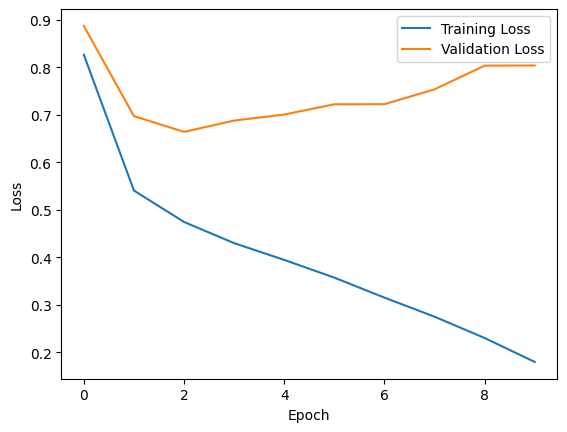

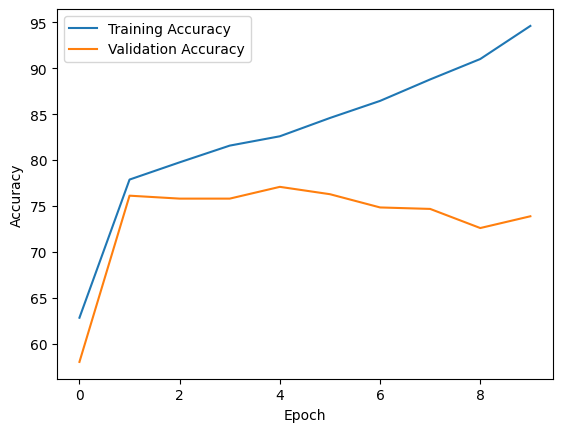

NameError: name 'testset' is not defined

In [25]:
if __name__ == '__main__':
    # Flag to control whether to run training or use saved fine-tuned model.
    train_model = True

    # Set random seed for reproducibility
#     random_seed = 42
#     torch.manual_seed(random_seed)
#     np.random.seed(random_seed)
#     random.seed(random_seed)

    # Number of classes
    num_classes = 3

    # Import ResNet50 model pretrained on ImageNet
    model = models.resnet50(pretrained=True)

    #Freeze all parameters
    for param in model.parameters():
        param.requires_grad = False
    
    #Modify conv1 to suit CIFAR-10
#     model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

    # Modify the final fully connected layer according to the number of classes
    num_features = model.fc.in_features
    

    model.fc = nn.Linear(num_features, num_classes)
    
    for param in model.fc.parameters():
        param.requires_grad = True
    for param in model.layer4.parameters():
      param.requires_grad = True


    print(model)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
# Create the data loaders

    # Load the dataset
#     trainset, trainloader, testset, testloader, classes = load_dataset()

    if train_model:
      # Train the model for 20 epochs, saving every 5 epochs
      num_epochs = 10
      save_interval = 5
      model, train_losses, train_accuracies, test_losses, test_accuracies = train_epochs(
          model, trainloader, testloader, criterion, optimizer, device,
          num_epochs, save_interval)

      # Save the final trained model
      torch.save(model.state_dict(), f'resnet50_{num_epochs}.pth')

      # Plot and save the loss and accuracy plots
      plot_loss(train_losses, test_losses)
      plot_accuracy(train_accuracies, test_accuracies)
    else:
      # Load the pre-trained model
      model.load_state_dict(torch.load('resnet50_cifar10_final_model_epochs_50.pth'))
      # Load the variables
      checkpoint = torch.load("resnet50_cifar10_variables.pth")
      epoch = checkpoint['epoch']
      train_losses = checkpoint['train_losses']
      train_accuracies = checkpoint['train_accuracies']
      test_losses = checkpoint['test_losses']
      test_accuracies = checkpoint['test_accuracies']
      classes = checkpoint['classes']
      model.to(device)
      model.eval()

    # Plot and save an example image
    plot_image(testset, model, classes)

**MLP for Image classification**

In [3]:
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Define the paths to your dataset folders
base_dir = '/kaggle/working/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define the batch size
batch_size = 150

# Define the transformations for the images
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # Convert image to grayscale
    transforms.Resize((224, 224)),               # Resize image to 224x224
    transforms.ToTensor(),                       # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485], std=[0.229]) # Normalize the tensor
])

# Converting_tensor_transform = transforms.ToTensor()
# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
validation_dataset = datasets.ImageFolder(validation_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create the data loaders
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validationloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
classes = ('normal', 'bacteria', 'visus')

In [4]:
class neuNet(nn.Module):
  def __init__(self):
    super(neuNet,self).__init__()
    self.fc1 = nn.Linear(224*224, 5000)
    self.fc2 = nn.Linear(5000,512)
    self.fc3 = nn.Linear(512,10)
    self.fc4 = nn.Linear(10,3)
    #The dropout layer (p=0.2)
    #Also the dropout prevents overfitting of data
    self.droput = nn.Dropout(0.2)

  def forward(self,x):
    ## flattening the image
    input
    x = x.view(-1, 224*224)
    x = Fn.relu(self.fc1(x))
    x = self.droput(x)
    x = Fn.relu(self.fc2(x))
    x = self.droput(x)
    x = Fn.relu(self.fc3(x))
    x = self.droput(x)
    x = self.fc4(x)
    return x


cpu
Epoch 1/10
Train Loss: 0.9763 - Train Accuracy: 54.85%
Test Loss: 0.8585 - Test Accuracy: 68.11%

Epoch 2/10
Train Loss: 0.7822 - Train Accuracy: 68.65%
Test Loss: 0.7988 - Test Accuracy: 61.70%

Epoch 3/10
Train Loss: 0.6825 - Train Accuracy: 70.82%
Test Loss: 0.6614 - Test Accuracy: 75.32%

Epoch 4/10
Train Loss: 0.6174 - Train Accuracy: 73.29%
Test Loss: 0.7421 - Test Accuracy: 69.87%

Epoch 5/10
Train Loss: 0.5900 - Train Accuracy: 74.06%
Test Loss: 0.7776 - Test Accuracy: 69.71%

Epoch 6/10
Train Loss: 0.5601 - Train Accuracy: 75.61%
Test Loss: 0.8301 - Test Accuracy: 68.91%

Epoch 7/10
Train Loss: 0.5397 - Train Accuracy: 76.13%
Test Loss: 0.8708 - Test Accuracy: 67.47%

Epoch 8/10
Train Loss: 0.5373 - Train Accuracy: 75.67%
Test Loss: 0.8172 - Test Accuracy: 70.03%

Epoch 9/10
Train Loss: 0.5229 - Train Accuracy: 76.59%
Test Loss: 0.8183 - Test Accuracy: 70.51%

Epoch 10/10
Train Loss: 0.5254 - Train Accuracy: 76.59%
Test Loss: 0.9181 - Test Accuracy: 67.95%



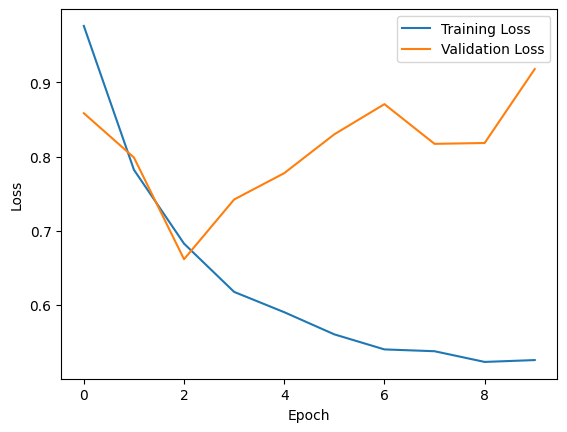

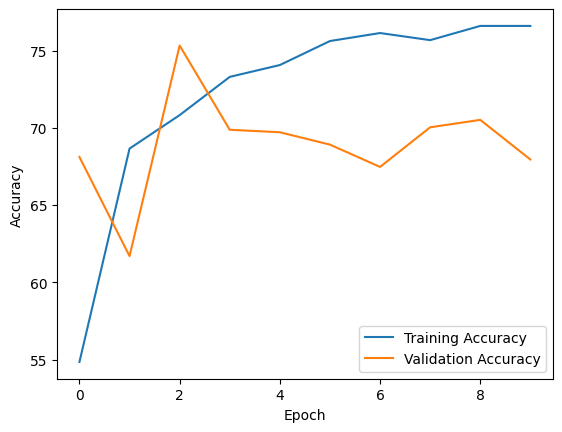

NameError: name 'testset' is not defined

In [12]:
if __name__ == '__main__':
    # Flag to control whether to run training or use saved fine-tuned model.
    train_model = True

    # Set random seed for reproducibility
#     random_seed = 42
#     torch.manual_seed(random_seed)
#     np.random.seed(random_seed)
#     random.seed(random_seed)

    # Number of classes
    num_classes = 3

    # Import ResNet50 model pretrained on ImageNet
    model = neuNet()


    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    model = model.to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)
# Create the data loaders

    # Load the dataset
#     trainset, trainloader, testset, testloader, classes = load_dataset()

    if train_model:
      # Train the model for 20 epochs, saving every 5 epochs
      num_epochs = 10
      save_interval = 5
      model, train_losses, train_accuracies, test_losses, test_accuracies = train_epochs(
          model, trainloader, testloader, criterion, optimizer, device,
          num_epochs, save_interval)

      # Save the final trained model
      torch.save(model.state_dict(), f'resnet50_{num_epochs}.pth')

      # Plot and save the loss and accuracy plots
      plot_loss(train_losses, test_losses)
      plot_accuracy(train_accuracies, test_accuracies)
    else:
      # Load the pre-trained model
      model.load_state_dict(torch.load('resnet50_cifar10_final_model_epochs_50.pth'))
      # Load the variables
      checkpoint = torch.load("resnet50_cifar10_variables.pth")
      epoch = checkpoint['epoch']
      train_losses = checkpoint['train_losses']
      train_accuracies = checkpoint['train_accuracies']
      test_losses = checkpoint['test_losses']
      test_accuracies = checkpoint['test_accuracies']
      classes = checkpoint['classes']
      model.to(device)
      model.eval()

    # Plot and save an example image
    plot_image(testset, model, classes)

In [13]:
label_true=[]
label_predicted=[]
with torch.no_grad():
    i = 0
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        if i != 4:
            label_true.append(labels.cpu().data.numpy())
            label_predicted.append(np.argmax(outputs.cpu().data.numpy(),axis=1))
        i +=1



In [ ]:
import numpy as np
Y_true = np.reshape(np.array(label_true), -1)
Y_pred = np.reshape(np.array(label_predicted),-1)
print(Y_true.shape)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_true,Y_pred)
sns.heatmap(cm,annot = True)


(600,)


In [26]:
label_true = np.array(label_true)
print(label_true.shape)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/resnet")

In [ ]:
model = best_model
model.load_state_dict(torch.load(PATH))
model.eval()

In [ ]:
# Unfreeze two last layer without FC
# print(getattr(model.layer4, "1"))
print(model.layer4[1].get_parameter)
for param in model.layer4[1].parameters():
  param.requires_grad = True

In [ ]:
print(model.layer4[0].get_parameter)
for param in model.layer4[0].parameters():
  param.requires_grad = True

In [ ]:
print(model.layer3[1].get_parameter)
for param in model.layer3[1].parameters():
  param.requires_grad = True

In [ ]:
# Load the pre-trained model
model = models.vgg11(pretrained=True)